**We are importing Libraries which we will use in our project

Pandas :-which is used for data cleaning and analysis. Here, Pandas is the best tool for handling this real-world messy data.

Numpy : - NumPy aims to provide an array object that is up to 50x faster than traditional Python lists. It is very useful for fundamental scientific computations in Machine Learning

sklearn : - sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction

The plotly Python library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-case

**

In [15]:
%cd C:\Users\jigna\PredictiveAnalyticsProject

C:\Users\jigna\PredictiveAnalyticsProject


# Importing the Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, make_scorer, confusion_matrix, classification_report, fbeta_score

In [17]:
# Read in train data
df = pd.read_csv('data.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no


***Using info() which helps us to tell the datatype of each column and tells us how much non-null values in each column***

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8371 entries, 0 to 8370
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8371 non-null   int64 
 1   job        8371 non-null   object
 2   marital    8371 non-null   object
 3   education  8371 non-null   object
 4   default    8371 non-null   object
 5   balance    8371 non-null   int64 
 6   housing    8371 non-null   object
 7   loan       8371 non-null   object
 8   contact    8371 non-null   object
 9   day        8371 non-null   int64 
 10  month      8371 non-null   object
 11  duration   8371 non-null   int64 
 12  campaign   8371 non-null   int64 
 13  pdays      8371 non-null   int64 
 14  previous   8371 non-null   int64 
 15  poutcome   8371 non-null   object
 16  deposit    8371 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


### **describe() gives us the information only of int/float datatypes columns . it provides us min , max , count and 25 percentile , 50 percentile ,75 percentile as well std  about column**

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,8371.0,41.197467,11.809300,18.0,32.0,39.0,49.0,95.0
balance,8371.0,1517.811134,3225.312218,-3058.0,116.0,532.0,1694.0,81204.0
day,8371.0,15.588460,8.406768,1.0,8.0,15.0,21.0,31.0
duration,8371.0,372.898698,346.706743,2.0,137.0,255.0,504.0,3284.0
campaign,8371.0,2.512603,2.734037,1.0,1.0,2.0,3.0,63.0
pdays,8371.0,49.911958,107.308417,-1.0,-1.0,-1.0,2.0,854.0
previous,8371.0,0.823677,2.315285,0.0,0.0,0.0,1.0,58.0


***Analyzing the each column of our dataset***

**Data Preprocessing**

### checking how many our dataset contains null values 

In [20]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
# Create train_x dataframe
X = df.drop(columns=['deposit'])
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure


In [23]:
Y = df['deposit']
Y.head()

0     no
1     no
2    yes
3     no
4     no
Name: deposit, dtype: object

In [24]:
# Get a list of columns for one-hot encoding
ohe_cols = list(X.select_dtypes(include='object').columns.values)

# We want to ordinal encode education
le_col = ['education']

# Drop education 
# ohe_cols.remove('education')
ohe_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [25]:
df[df.select_dtypes(include="object").columns.values]

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,technician,married,tertiary,no,yes,no,cellular,oct,success,no
1,housemaid,married,primary,no,no,no,cellular,aug,unknown,no
2,management,single,tertiary,no,yes,no,cellular,may,failure,yes
3,blue-collar,married,primary,no,yes,no,cellular,may,unknown,no
4,services,married,secondary,no,yes,yes,cellular,jan,failure,no
...,...,...,...,...,...,...,...,...,...,...
8366,management,married,tertiary,no,no,no,cellular,may,unknown,yes
8367,services,married,secondary,no,no,no,cellular,feb,unknown,yes
8368,blue-collar,married,primary,no,yes,no,unknown,may,unknown,no
8369,retired,divorced,unknown,no,yes,no,unknown,may,unknown,no


In [26]:
X = pd.get_dummies(X, prefix=ohe_cols, columns=ohe_cols, drop_first=True)
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,38,127,14,113,1,50,2,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,41,365,8,203,5,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,39,2454,4,716,3,263,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,49,6215,11,549,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,37,1694,29,404,2,251,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
# Perform Ordinal encoding on education
ed_cat = {'unknown': 0, 
          'primary': 1,
          'secondary': 2,
          'tertiary': 3}
X['education'] = X['education'].replace(ed_cat)
X['education'].value_counts(normalize=True)

2    0.491339
3    0.328993
1    0.134751
0    0.044917
Name: education, dtype: float64

In [27]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,38,127,14,113,1,50,2,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,41,365,8,203,5,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,39,2454,4,716,3,263,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,49,6215,11,549,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,37,1694,29,404,2,251,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As we know that our model don't perform on Label mean textual data . That's for it we have to convert these label which is male and femal in numbers .For converting Label into 0,1 format of Label column , we will use Label Encoder . Label encoder assigned the value on the basis of the order of alphabets. That's for it , Female will be 0 and male will be 1 .

In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
 
Y = le.fit_transform(Y)
Y

array([0, 0, 1, ..., 0, 0, 1])

In [29]:
len(Y[Y==0])

4428

In [30]:
df['deposit'].value_counts()

no     4428
yes    3943
Name: deposit, dtype: int64

In [31]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,38,127,14,113,1,50,2,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,41,365,8,203,5,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,39,2454,4,716,3,263,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,49,6215,11,549,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,37,1694,29,404,2,251,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Feature Scaling**

In [32]:
from sklearn.preprocessing import MinMaxScaler

sc_X = MinMaxScaler() 
X = sc_X.fit_transform(X)

**Selecting Best 35 columns out of 40 using chi2 Test**

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k=35)
fit = test.fit(X, Y)
X=test.fit_transform(X, Y)

In [34]:
len(X[0])

35

.Logisitc Regression is our base model

.Random Forest Classifier is our actual model

In [35]:
#from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

lr = LogisticRegression()
rf = RandomForestClassifier()


**Cross Validation with Random Forest Classifier**

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, Y, scoring='accuracy')
print(scores)

[0.83701493 0.83452808 0.8213859  0.83632019 0.83930705]


**Splitting our dataset into train and test**

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state = 42, test_size = 0.2)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       884
           1       0.84      0.78      0.81       791

    accuracy                           0.83      1675
   macro avg       0.83      0.83      0.83      1675
weighted avg       0.83      0.83      0.83      1675



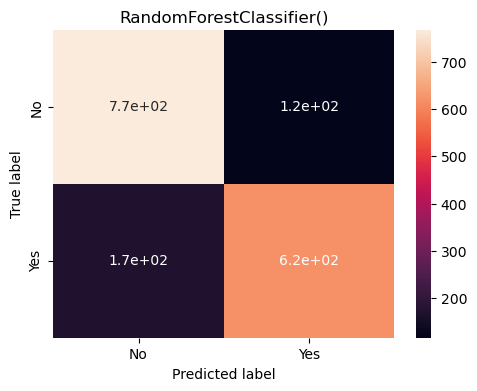

In [40]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Logistic Regression
accuracy = []
lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)
accuracy.append(accuracy_score(y_predict,y_test))
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test, y_predict)
cm_df = pd.DataFrame(cm,
                     index = ['No','Yes',], 
                     columns = ['No','Yes'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title(model)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Random Forest

*********************************** LogisticRegression() ***********************************
+++++++++++++ ==================== Classification Report  LogisticRegression() ==================== 
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       884
           1       0.84      0.78      0.81       791

    accuracy                           0.83      1675
   macro avg       0.83      0.83      0.83      1675
weighted avg       0.83      0.83      0.83      1675

+++++++++++++ ==================== Confusion Metrix of LogisticRegression() ==================== 


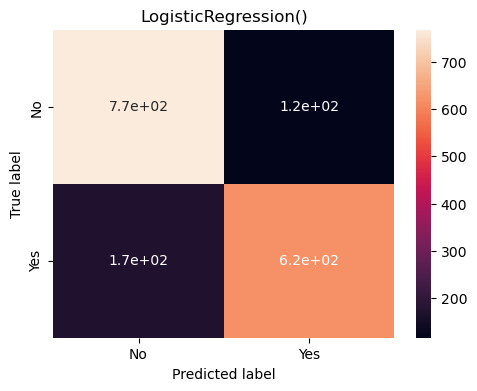

*********************************** RandomForestClassifier() ***********************************
+++++++++++++ ==================== Classification Report  RandomForestClassifier() ==================== 
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       884
           1       0.82      0.85      0.84       791

    accuracy                           0.84      1675
   macro avg       0.84      0.84      0.84      1675
weighted avg       0.84      0.84      0.84      1675

+++++++++++++ ==================== Confusion Metrix of RandomForestClassifier() ==================== 


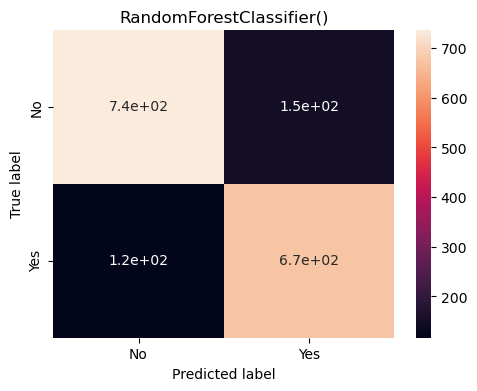

In [38]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

models = [lr ,rf]
accuracy = []
for model in models :
  model.fit(x_train, y_train)
# rfc.score(x_train, y_train)
  y_predict = model.predict(x_test)
  accuracy.append(accuracy_score(y_predict,y_test))
  print("*"*35,model,"*"*35)
  print(f'+++++++++++++ {"="*20} Classification Report  {model} {"="*20} ')
  print(classification_report(y_test,y_predict))

  print(f'+++++++++++++ {"="*20} Confusion Metrix of {model} {"="*20} ')
          
  cm = confusion_matrix(y_test, y_predict) 

# # Transform to df for easier plotting
  cm_df = pd.DataFrame(cm,
                     index = ['No','Yes',], 
                     columns = ['No','Yes'])

  plt.figure(figsize=(5.5,4))
  sns.heatmap(cm_df, annot=True)
  plt.title(model)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

**Analyzing Results**

In [39]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest Classifier'], 'Accuracy': accuracy})
model_ev


,Model,Accuracy
0,Logistic Regression,0.828060
1,Random Forest Classifier,0.842388


**How we can enhance accuracy of our base model and atual model**

we are getting good accuracy on both models .Accuracy mean the quality or state of being correct or precise .Accuarcy of Logistic Regression model which is our baseline model is 83% and our actual model Random Forest whose accuracy is around 85% . If we want to increase the accuracy of Logistic Regression baseline model then we will have to do the hyper parameter tunning using 

GridSearchCV,

RandomsizedSearch CV,

HyperOpt-Sklearn etc, 

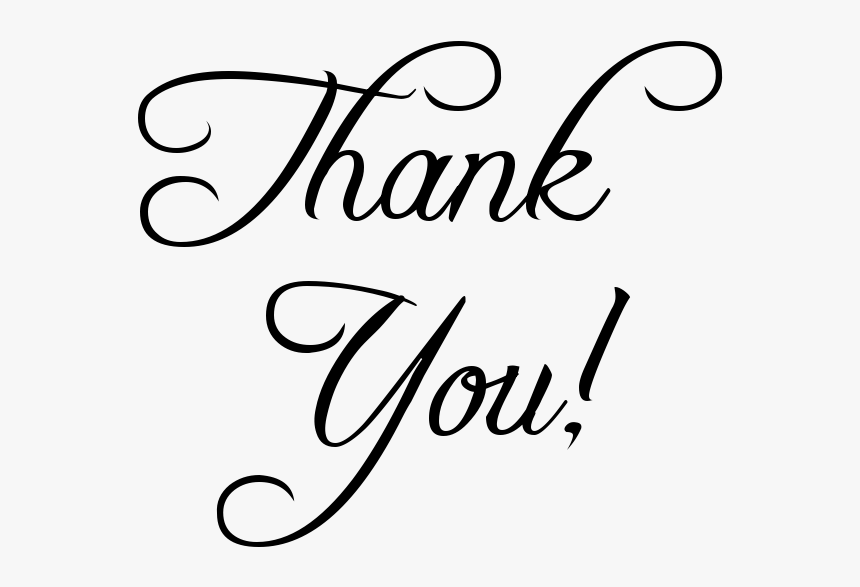